In [1]:
from typing import NoReturn
import logging

import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt

import scipy as sp

In [2]:
def convm(x: ArrayLike, p: int) -> np.ndarray:
    """Construct the convolution matrix of the signal x with p number of parameters.

    (N + p - 1) by p non-symmetric Toeplitz matrix
    """
    _x = np.array(x, dtype=complex).ravel()
    if p < 1:
        raise ValueError(f"{p=} must be greater or equal to 1.")

    N = len(_x) + 2 * p - 2
    # the signal centered over its support
    # needed for the signal information-preserving frequency spectrum
    xcol = (_x.copy()).reshape(-1, 1)
    logging.warning(f'\n{xcol=}')
    xpad = np.concatenate((np.zeros((p - 1, 1)), xcol, np.zeros((p - 1, 1))))
    logging.warning(f'{xpad=}\n')
    X = np.empty([len(_x) + p - 1, p], dtype=complex)
    for i in range(p):
        X[:, i] = xpad[p - i - 1:N - i, 0]
    return X

In [3]:
def covar(x: ArrayLike, p: int) -> np.ndarray:
    """Covariance Matrix.

    p x p hermitian toeplitz matrix of sample covariances
    """
    _x = np.array(x, dtype=complex)
    m = len(_x)
    # remove the mean
    #_x = _x - np.mean(_x)
    conv = convm(x, p + 1)
    logging.warning(f'\n{conv.shape=}')
    logging.warning(f'\n{conv=}')
    R = conv.conjugate().transpose() @ conv.copy() / (m - 1)
    return R

In [4]:
def phd(x, p):
    R = covar(x, p)
    Rx = sp.linalg.toeplitz(x)
    d, v = np.linalg.eigh(Rx)
    index = np.argmin(d)
    vmin = v[:, index].copy()
    sigma = d[index]
    logging.warning(f'{v=}')
    logging.warning(f'{vmin=}')
    logging.warning(f'{sigma=}')
    rts = np.roots(vmin)
    vsig = np.delete(v, index, 1)
    phases = np.angle(rts)
    siggie = np.exp(1j * np.arange(p + 1).reshape(-1, 1) * phases)
    dtft = vsig.transpose() @ siggie.conjugate()
    dtft = np.abs(dtft)**2
    dsig = np.delete(d, index) - d[index]
    np.linalg.solve(dtft, dsig)

In [270]:
p = 2
x = np.array([6, 1.92705 + 4.58522j, -3.42705 + 3.49541j], dtype=complex)
Rx = sp.linalg.toeplitz(x)
#Rx_conv = Rx_conv / np.abs(Rx_conv)
# Rx = Rx / np.abs(Rx)
d, v = np.linalg.eigh(Rx)
print(f'{Rx=}')
print(f'{d=}')
print(f'{v=}')

index = np.argmin(d)
vmin = v[:, index].copy()
sigma = d[index]
rts = np.roots(vmin)
vsig = np.delete(v, index, 1)
phases = np.angle(rts)
print(f'{v=}')
print(f'{vmin=}')
print(f'{sigma=}')
print(f'{rts=}')
print(f'{phases=}')

Rx=array([[ 6.     +0.j     ,  1.92705-4.58522j, -3.42705-3.49541j],
       [ 1.92705+4.58522j,  6.     +0.j     ,  1.92705-4.58522j],
       [-3.42705+3.49541j,  1.92705+4.58522j,  6.     +0.j     ]])
d=array([ 1.00000161,  1.10485869, 15.8951397 ])
v=array([[ 0.40974303+0.j        , -0.7070716 +0.j        ,
        -0.57633359+0.j        ],
       [-0.33145704-0.74455189j, -0.0091694 +0.00392879j,
        -0.22439919-0.53415747j],
       [-0.2741981 +0.30447455j, -0.48772554+0.51193168j,
         0.40342281-0.41159499j]])
v=array([[ 0.40974303+0.j        , -0.7070716 +0.j        ,
        -0.57633359+0.j        ],
       [-0.33145704-0.74455189j, -0.0091694 +0.00392879j,
        -0.22439919-0.53415747j],
       [-0.2741981 +0.30447455j, -0.48772554+0.51193168j,
         0.40342281-0.41159499j]])
vmin=array([ 0.40974303+0.j        , -0.33145704-0.74455189j,
       -0.2741981 +0.30447455j])
sigma=1.000001605433868
rts=array([0.49995334+0.86605234j, 0.30898547+0.95106676j])
phases=array

In [301]:
m = p + 1
_x = convm(x, 3)
print(f'{_x=}')
Rx_conv = _x.transpose().conjugate() @ _x / (m - 1)
md, mv = np.linalg.eigh(Rx_conv) 
print(mv)
print(md)
print(f'{Rx_conv=}')

xcol=array([[ 6.     +0.j     ],
       [ 1.92705+4.58522j],
       [-3.42705+3.49541j]])
       [ 0.     +0.j     ],
       [ 6.     +0.j     ],
       [ 1.92705+4.58522j],
       [-3.42705+3.49541j],
       [ 0.     +0.j     ],
       [ 0.     +0.j     ]])



_x=array([[ 6.     +0.j     ,  0.     +0.j     ,  0.     +0.j     ],
       [ 1.92705+4.58522j,  6.     +0.j     ,  0.     +0.j     ],
       [-3.42705+3.49541j,  1.92705+4.58522j,  6.     +0.j     ],
       [ 0.     +0.j     , -3.42705+3.49541j,  1.92705+4.58522j],
       [ 0.     +0.j     ,  0.     +0.j     , -3.42705+3.49541j]])
[[ 4.50498695e-01+0.00000000e+00j -7.07106781e-01+0.00000000e+00j
  -5.45023785e-01+0.00000000e+00j]
 [-2.98521271e-01-7.10624304e-01j -2.27953641e-05+9.57514534e-06j
  -2.46718268e-01-5.87391049e-01j]
 [-3.15349585e-01+3.21719931e-01j -4.95005738e-01+5.04944868e-01j
   3.81556444e-01-3.89185824e-01j]]
[10.67806844 27.66469226 88.70772968]
Rx_conv=array([[ 42.35016346 +0.j        ,  10.49271357-24.98046402j,
        -10.28115   -10.48623j   ],
       [ 10.49271357+24.98046402j,  42.35016346 +0.j        ,
         10.49271357-24.98046402j],
       [-10.28115   +10.48623j   ,  10.49271357+24.98046402j,
         42.35016346 +0.j        ]])


In [311]:
v1 = mv[:,0]
print(v1)
v1n = np.abs(v1)
print(v1.conjugate() @ v1)
newv1 = mv[:,1] / v1n
newv2 = mv[:,2] / v1n
print(newv1)
print(newv2)

[ 0.4504987 +0.j         -0.29852127-0.7106243j  -0.31534958+0.32171993j]
(1+0j)
[-1.56960894e+00+0.00000000e+00j -2.95744093e-05+1.24226692e-05j
 -1.09879505e+00+1.12085756e+00j]
[-1.20982323+0.j         -0.32008908-0.76207352j  0.84696459-0.8639j    ]
v=array([[ 0.40974303+0.j        , -0.7070716 +0.j        ,
        -0.57633359+0.j        ],
       [-0.33145704-0.74455189j, -0.0091694 +0.00392879j,
        -0.22439919-0.53415747j],
       [-0.2741981 +0.30447455j, -0.48772554+0.51193168j,
         0.40342281-0.41159499j]])
vmin=array([ 0.4504987 +0.j        , -0.29852127-0.7106243j ,
       -0.31534958+0.32171993j])
sigma=10.678068441422983
rts=array([-0.14610692+0.9892688j,  0.80875317+0.5881482j])
phases=array([1.71742813, 0.62876724])


In [312]:
siggie = np.exp(1j * np.arange(p + 1).reshape(-1, 1) * phases)
dtft = vsig.transpose() @ siggie.conjugate()
d2 = np.fft.fft(vsig[:,-1], 1024, norm="ortho")
dtft = np.abs(dtft)**2
dsig = np.delete(d, index) - d[index]
np.linalg.solve(dtft, dsig)

array([ 14443.19047548, -14438.19047709])

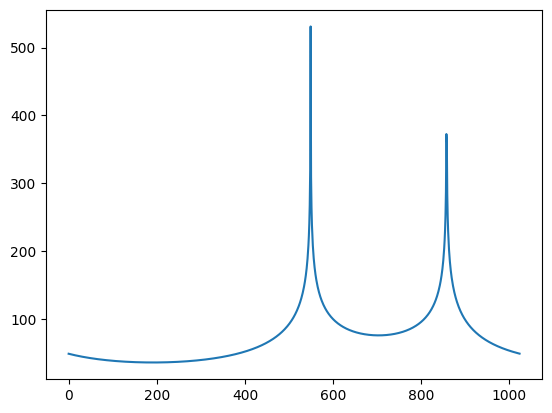

In [313]:
plt.plot(2 * np.log2(np.abs(d2))**2)